In [1]:
conda install -c conda-forge liblsl

pip install pylsl

conda install -c conda-forge pyedflib

!pip install mne
pip install https://api.github.com/repos/mne-tools/mne-realtime/zipball/main

pip install pyuserinput


pip install zmq msgpack pyuserinput


SyntaxError: invalid syntax (492932747.py, line 1)

In [1]:
# to create lsl stream from edf file

import numpy as np
import pylsl as lsl
import pyedflib

# Load the EDF file
filename = r'C:\Users\welcome\ravi1.edf'
f = pyedflib.EdfReader(filename)
n = f.signals_in_file
signal_labels = f.getSignalLabels()

# Convert the EDF file data into a Numpy array
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
    sigbufs[i, :] = f.readSignal(i)

# Create the LSL outlet
info = lsl.StreamInfo('EEG', 'EEG', n, f.getSampleFrequency(0), lsl.cf_float32, 'uid_EEG')
channels = info.desc().append_child("channels")
for c in signal_labels:
    channels.append_child("channel").append_child_value("label", c)
outlet = lsl.StreamOutlet(info)

# Stream the data continuously
while True:
    outlet.push_sample(sigbufs)

TypeError: only size-1 arrays can be converted to Python scalars

In [4]:
# get chunk(list) of data using only pylsl 

import pylsl as lsl
import time

start_time = time.time()


try:
    # first resolve an EEG stream on the lab network
    print("looking for an EEG stream...")
    streams = lsl.resolve_stream('type', 'Band-Power')
    # create a new inlet to read from the stream
    inlet = lsl.stream_inlet(streams[0])  

    while time.time()-start_time<10:
        # get a new sample (you can also omit the timestamp part if you're not
        # interested in it)

        time.sleep(1)
        chunk, timestamp = inlet.pull_chunk()

        
        if timestamp:
            print(len(chunk),chunk[1])
        
        print(len(chunk))      
        
except KeyboardInterrupt:
    print("you pressed ctrl+c")

except Exception as e:
    print(f"Exception name:{e}")
    

looking for an EEG stream...
0
8 [1677304433.4342, 574.584, 330.638, 579.335, 1163.857, 2785.234, 857.483, 1664.337, 2879.021, 2723.095, 8487.744, 643.181, 1418.305, 797.511, 1163.888, 1528.577, 1.986, 8.52, 8.314, 11.483, 27.677, 804.107, 1538.765, 1615.864, 2006.196, 2157.532]
8
8 [1677304434.4341, 282.176, 568.799, 443.78, 617.275, 2332.081, 162.52, 1282.885, 1573.586, 1769.075, 7172.802, 306.728, 665.416, 745.042, 689.054, 1497.355, 0.625, 6.181, 8.251, 6.8, 24.922, 1831.695, 720.375, 1088.973, 1234.796, 2357.182]
8
8 [1677304435.434, 364.222, 386.385, 469.718, 775.101, 1892.848, 1072.763, 1357.28, 764.635, 2862.807, 6944.404, 486.981, 726.634, 416.512, 733.039, 1538.04, 5.143, 5.252, 2.174, 10.998, 24.576, 1238.631, 505.272, 562.812, 861.085, 2148.027]
8
8 [1677304436.4333, 543.051, 274.708, 460.696, 1300.295, 2087.704, 1655.008, 1759.062, 722.081, 6264.39, 4888.856, 681.401, 510.881, 286.55, 1685.116, 1286.222, 4.913, 6.137, 3.214, 26.354, 18.89, 1023.599, 1308.228, 831.416, 2309

In [17]:
chunk[0][1]

797.703

In [3]:
import pylsl as lsl
import time

streams = lsl.resolve_stream('type', 'Band-Power')
# create a new inlet to read from the stream
inlet = lsl.stream_inlet(streams[0])   
chunk, timestamp = inlet.pull_chunk()


Plot real-time epoch data with LSL client
This example demonstrates how to use the LSL client to plot real-time
collection of event data from an LSL stream.
For the purposes of demo, a mock LSL stream is constructed. You can
replace this with the stream of your choice by changing the host id to
the desired stream.



NameError: name 'raw' is not defined

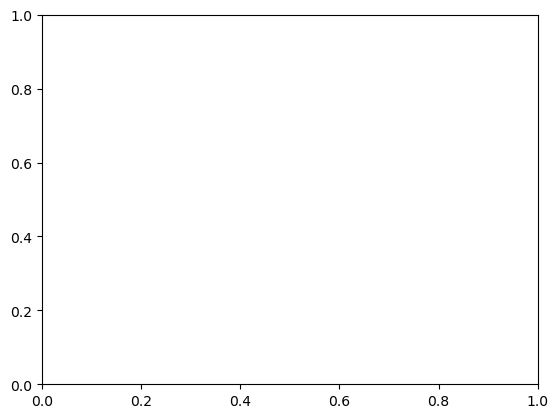

In [53]:
"""
==============================================================
Plot real-time epoch data with LSL client
==============================================================
This example demonstrates how to use the LSL client to plot real-time
collection of event data from an LSL stream.
For the purposes of demo, a mock LSL stream is constructed. You can
replace this with the stream of your choice by changing the host id to
the desired stream.
"""
# Author: Teon Brooks <teon.brooks@gmail.com>
#
# License: BSD (3-clause)
import matplotlib.pyplot as plt

from mne.datasets import sample
from mne.io import read_raw_fif

from mne_realtime import LSLClient, MockLSLStream

print(__doc__)

# this is the host id that identifies your stream on LSL
host = 'mne_stream'
# this is the max wait time in seconds until client connection
wait_max = 5


# Load a file to stream raw data
data_path = sample.data_path()
raw_fname = data_path  / 'MEG' / 'sample' / 'sample_audvis_filt-0-40_raw.fif'
raw = read_raw_fif(raw_fname).crop(0, 30).load_data().pick('eeg')

# For this example, let's use the mock LSL stream.
_, ax = plt.subplots(1)
n_epochs = 5

# main function is necessary here to enable script as own program
# in such way a child process can be started (primarily for Windows)
if __name__ == '__main__':
    with MockLSLStream(host, raw, 'eeg'):
        with LSLClient(info=raw.info, host=host, wait_max=wait_max) as client:
            client_info = client.get_measurement_info()
            sfreq = int(client_info['sfreq'])

            # let's observe ten seconds of data
            for ii in range(n_epochs):
                print('Got epoch %d/%d' % (ii + 1, n_epochs))
                plt.cla()
                epoch = client.get_data_as_epoch(n_samples=sfreq)
                epoch.average().plot(axes=ax)
                plt.pause(1.)
            plt.draw()
print('Streams closed')

In [4]:
#matlab trylsl.m

import java.awt.Robot;
import java.awt.event.*;
lib = lsl_loadlib();

mouse = Robot;
result = {};
while isempty(result)
    result = lsl_resolve_byprop(lib,'type','EEG'); 
end
%hhhhhhhhihhiihhhh
inlet = lsl_inlet(result{1});

while(1)

   
    [chunk,stamps] = inlet.pull_chunk();
    pause(5);
    [chunk,stamps] = inlet.pull_chunk();
    
   chunk=chunk(4,:);%select channel
 if length(chunk)>639
  chunk=chunk(:,1:640);
  
  chunk=filtr(chunk,128,49,51,640,[],1); %notch
  
 chunk= filtr_fft(chunk,128,0.2,35);
  
[pxx, pff]=pwelch(chunk,[],[],512,128);

features=pxx';
testResult = scg_test(network, weightVector, features);
a1=round(testResult);
    if sum (a1)==1
    
%         pause(0.3);
%         mouse.mousePress(InputEvent.BUTTON2_MASK);    %left click press
%         mouse.mouseRelease(InputEvent.BUTTON2_MASK);   %left click release
%             
           % mouse.keyPress(KeyEvent.VK_V)
            pause(0.3);

    end
     if a1(2)==1
%         pause(0.1);
%         mouse.mousePress(InputEvent.BUTTON2_MASK);    %left click press
%         mouse.mouseRelease(InputEvent.BUTTON2_MASK);   %left click release
%             
            mouse.keyPress(KeyEvent.VK_S)
            
             pause(0.3);

     end
     if a1(3)==1
%         pause(0.1);
%         mouse.mousePress(InputEvent.BUTTON2_MASK);    %left click press
%         mouse.mouseRelease(InputEvent.BUTTON2_MASK);   %left click release
%             
        mouse.keyPress(KeyEvent.VK_I)
        pause(0.3);

     end
     if a1(4)==1
%          pause(0.3);
%             mouse.mousePress(InputEvent.BUTTON2_MASK);    %left click press
%             mouse.mouseRelease(InputEvent.BUTTON2_MASK);   %left click release
%            
      mouse.keyPress(KeyEvent.VK_H)
       pause(0.3);
     end
 end
end    ++++++++++        

In [8]:
import zmq
from msgpack import loads
import subprocess as sp
from platform import system

try:
    from pymouse import PyMouse
except ImportError:
    msg = """
    Please install PyMouse from PyUserInput
    https://github.com/PyUserInput/PyUserInput

    pip install PyUserInput
    """
    print(msg)
    exit(1)


m = PyMouse()

m.move(1,1)

In [ ]:

"""
Stream Pupil gaze coordinate data using zmq to control a mouse with your eye.
Please note that marker tracking must be enabled, and in this example we have named the surface "screen."
You can name the surface what you like in Pupil capture and then write the name of the surface you'd like to use on line 17.
"""
print("start")
# specify the name of the surface you want to use
surface_name = "screen"

## install dependencies
# pip3 install zmq msgpack pyuserinput

import zmq
from msgpack import loads
import subprocess as sp
from platform import system

try:
    from pymouse import PyMouse
except ImportError:
    msg = """
    Please install PyMouse from PyUserInput
    https://github.com/PyUserInput/PyUserInput

    pip install PyUserInput
    """
    print(msg)
    exit(1)


m = PyMouse()


context = zmq.Context()
# open a req port to talk to pupil
addr = "127.0.0.1"  # remote ip or localhost
req_port = "50020"  # same as in the pupil remote gui
req = context.socket(zmq.REQ)
req.connect("tcp://{}:{}".format(addr, req_port))
# ask for the sub port
req.send_string("SUB_PORT")
sub_port = req.recv_string()

# open a sub port to listen to pupil
sub = context.socket(zmq.SUB)
sub.connect("tcp://{}:{}".format(addr, sub_port))
sub.setsockopt_string(zmq.SUBSCRIBE, f"surfaces.{surface_name}")

smooth_x, smooth_y = 0.5, 0.5

# screen size
x_dim, y_dim = m.screen_size()
print("x_dim: {}, y_dim: {}".format(x_dim, y_dim))

while True:
    print("name")
    sub
    topic, msg = sub.recv_multipart()
    print(msg,topic)
    gaze_position = loads(msg, raw=False)
    print("name")
    if gaze_position["name"] == surface_name:
        gaze_on_screen = gaze_position["gaze_on_surfaces"]
        if len(gaze_on_screen) > 0:

            # there may be multiple gaze positions per frame, so you could average them
            # raw_x = sum([i['norm_pos'][0] for i in gaze_on_screen])/len(gaze_on_screen)
            # raw_y = sum([i['norm_pos'][1] for i in gaze_on_screen])/len(gaze_on_screen)

            # or just use the most recent gaze position on the surface
            raw_x, raw_y = gaze_on_screen[-1]["norm_pos"]

            # smoothing out the gaze so the mouse has smoother movement
            smooth_x += 0.35 * (raw_x - smooth_x)
            smooth_y += 0.35 * (raw_y - smooth_y)
            x = smooth_x
            y = smooth_y

            y = 1 - y  # inverting y so it shows up correctly on screen
            x *= int(x_dim)
            y *= int(y_dim)
            # PyMouse or MacOS bugfix - can not go to extreme corners because of hot corners?
            x = min(x_dim - 10, max(10, x))
            y = min(y_dim - 10, max(10, y))

            # print "%s,%s\n" %(x,y)
            m.move(int(x), int(y))

In [ ]:
#pythonpupil.py
"""Receive data from Pupil using ZMQ. This script will connect to PupilRemote and start streaming incoming data to Matlab
via UDP"""

import socket
import timeit

# install via pip or lookup how to install
import numpy as np
import zmq
from msgpack import loads

# this package needs to be installed can be found at (https://pypi.python.org/pypi/numpy_ringbuffer/0.2.0)
from numpy_ringbuffer import RingBuffer

# change this value to the period of UDP Send normally 0.02 = 20 ms
downSampleRate = 0

# Matlab Address for relaying info
my_socket = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
my_socket.connect(('127.0.0.1', 8821)) # IP TO MATLAB


# setup ZMQ Context
context = zmq.Context()

# open a req port to talk to pupil
addr = '192.168.55.55'  # IP to machine running pupil software
# addr = '192.168.1.25'
req_port = "50020"  # same as in the pupil remote gui
req = context.socket(zmq.REQ)
req.connect("tcp://{}:{}".format(addr, req_port))
# ask for the sub port
req.send_string('SUB_PORT')
sub_port = req.recv_string()
# open a sub port to listen to pupil
sub = context.socket(zmq.SUB)
sub.connect("tcp://{}:{}".format(addr, sub_port))

# set subscriptions to topics
# recv just pupil/gaze/notifications
# sub.setsockopt_string(zmq.SUBSCRIBE, 'pupil.')
sub.setsockopt_string(zmq.SUBSCRIBE, 'gaze')
# packID tells matlab how to handle the data 0 is for gaze 1 is for surface
packID = np.array([0])
# sub.setsockopt_string(zmq.SUBSCRIBE, 'notify.')
# sub.setsockopt_string(zmq.SUBSCRIBE, 'logging.')
# sub.setsockopt_string(zmq.SUBSCRIBE, 'surface')
# packID = np.array([1])
# or everything:
# sub.setsockopt_string(zmq.SUBSCRIBE, '')


req.send_string('T 0')
# print
print(req.recv_string())

# initialize Timer
start_time = timeit.default_timer()

# intialize timeout counter
TOcounter = 0

# Setup ring buffers
norm_x_RB = RingBuffer(capacity=5, dtype='float32')
norm_y_RB = RingBuffer(capacity=5, dtype='float32')
confRB = RingBuffer(capacity=5, dtype='float32')



while True:

    # timeout will be 0 if nothing was received in the time allotted time is in ms
    timeout = sub.poll(8)

    if not timeout:

        TOsetter = True

        if (TOsetter == True
            and TOcounter < 1):

            TOcounter = 1
            print("timeout...", TOcounter)

        # TOcounter will determine how many ms before it sends the framework an empty message
        # (note: NaNs are made in Framework.EyeTracker.PupilNetwork.m)
        # if sub.poll(8) and TOcounter set to 2 then 16 ms before sending NaNs
        elif TOcounter == 2:

            # payload
            payload = np.zeros(28, dtype='uint8')

            #bytelen 3 includes packID bytelen and checksum
            bytelen = np.array([len(payload) + 3])
            bytelen = bytelen.astype('uint8')

            # checksum
            checksum = np.sum(np.hstack((payload))) % 256
            checksum = checksum.astype('uint8')

            # packID 3 for timeout matlab framework should hard code NaNs w/ this ID
            packID = np.array([3])
            packID = packID.astype('uint8')

            uMsg = np.hstack((bytelen, packID, payload, checksum))
            my_socket.send(uMsg)

            print('.........................................HARD TIMEOUT.........................................')

            # reset TOcounter
            TOcounter = 0

        elif (TOsetter == True and
            TOcounter >= 1):

            TOcounter = TOcounter + 1
            print("timeout...", TOcounter)

    else:
        # Receive ZMQ message
        topic = sub.recv_string()
        msg = sub.recv()
        msg = loads(msg, encoding='utf-8')
        # print("\n{}: {}".format(topic, msg))

        # reset timeout counter
        TOsetter = False
        TOcounter = 0

        # this will pull time from original message
        timestamp = msg["timestamp"]
        # print timestamp
        length = len(msg)

        # pull data: norm_pos, conf, timestamp
        norm_pos = msg["norm_pos"]
        confidence = msg["confidence"]
        timestamp = msg["timestamp"]

        # convert dict values to np.array will be float64
        norm_pos = np.array(norm_pos)
        conf = np.array([confidence])
        timestamp = np.array([timestamp])

        # cast values to float or single
        norm_pos1 = norm_pos.astype('float32')
        conf1 = conf.astype('float32')
        timestamp1 = timestamp.astype('float32')

        # Circular buffer (recent values on the right...old dropped from left) this is left here when dealing with surfaces will update this later
        # my current version that I use in lab uses this
        norm_x_RB.append(norm_pos1[0])
        norm_y_RB.append(norm_pos1[1])
        confRB.append(conf1)

        recent_time = timeit.default_timer()
        if recent_time - start_time >= downSampleRate:
            if len(norm_x_RB) > 1:
                # average the values
                norm_x_avg = np.mean(norm_x_RB, keepdims=1)
                norm_y_avg = np.mean(norm_y_RB, keepdims=1)
                conf_avg = np.mean(confRB, keepdims=1)

                # typecast these values
                norm_x_avg.dtype = 'uint8'
                norm_y_avg.dtype = 'uint8'
                conf_avg.dtype = 'uint8'

                # issue arose where if you pulled timestamp again it would change the shape of timestamp1
                # on the following iteration this avoids the shape change
                # if x == 0:
                timestamp = np.array([timestamp])
                timestamp1 = timestamp.astype('float32')
                timestamp1.dtype = 'uint8'
                timestamp2 = np.squeeze(timestamp1)

                # payload
                payload = np.hstack((norm_x_avg, norm_y_avg, conf_avg, timestamp2))
                # print len(payload)

                # payload length cast and typecasting
                bytelen = np.array([len(payload) + 3])
                bytelen = bytelen.astype('uint8')

                # calculate the checksum ONLY off payload
                checksum = np.sum(np.hstack((payload))) % 256
                checksum = checksum.astype('uint8')

                # packet ID (tells matlab if this is a surface or not) 1 is Surface 0 is gaze
                packID = np.array([0])
                packID = packID.astype('uint8')

                # create final udp msg bytestream and send to MATLAB
                uMsg = np.hstack((bytelen, packID, payload, checksum))
                my_socket.send(uMsg)
                print('Average sent....')

                norm_x_RB = RingBuffer(capacity=5, dtype='float32')
                norm_y_RB = RingBuffer(capacity=5, dtype='float32')
                confRB = RingBuffer(capacity=5, dtype='float32')


            else:
                # typecast all values
                norm_pos1.dtype = 'uint8'
                conf1.dtype = 'uint8'

                # issue arose where if you pulled timestamp again it would change the shape of timestamp1
                # on the following iteration this avoids the shape change
                # if x == 0:
                timestamp = np.array([timestamp])
                timestamp1 = timestamp.astype('float32')
                timestamp1.dtype = 'uint8'
                timestamp2 = np.squeeze(timestamp1)

                # payload
                payload = np.hstack((norm_pos1, conf1, timestamp2))
                # print len(payload)

                # payload length cast and typecasting
                bytelen = np.array([len(payload) + 3])
                bytelen = bytelen.astype('uint8')

                # calculate the checksum ONLY off payload
                checksum = np.sum(np.hstack((payload))) % 256
                checksum = checksum.astype('uint8')

                # packet ID (tells matlab if this is a surface or not) 1 is Surface 0 is gaze
                packID = np.array([0])
                packID = packID.astype('uint8')

                # create final udp msg bytestream and send to MATLAB
                uMsg = np.hstack((bytelen, packID, payload, checksum))
                print(uMsg[1])
                # print len(uMsg)
                # print "great successsss"
                my_socket.send(uMsg)
                start_time = recent_time


In [ ]:
"""
Receive data from Pupil using ZMQ. This script will connect to PupilRemote and start streaming incoming data to Matlab
via UDP
"""
import socket
import timeit

# install via pip or lookup how to install
import numpy as np
import zmq
from msgpack import loads

# this package needs to be installed can be found at (https://pypi.python.org/pypi/numpy_ringbuffer/0.2.0)
from numpy_ringbuffer import RingBuffer

# change this value to the period of UDP Send normally 0.02 = 20 ms
downSampleRate = 0

# Matlab Address for relaying info
my_socket = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
my_socket.connect(('127.0.0.1', 8821)) # IP TO MATLAB


# setup ZMQ Context
context = zmq.Context()

# open a req port to talk to pupil
addr = '192.168.100.1'  # IP to machine running pupil software
# addr = '192.168.1.25'
req_port = "50020"  # same as in the pupil remote gui
req = context.socket(zmq.REQ)
req.connect("tcp://{}:{}".format(addr, req_port))
# ask for the sub port
req.send_string('SUB_PORT')
sub_port = req.recv_string()
# open a sub port to listen to pupil
sub = context.socket(zmq.SUB)
sub.connect("tcp://{}:{}".format(addr, sub_port))

# set subscriptions to topics
# recv just pupil/gaze/notifications
# sub.setsockopt_string(zmq.SUBSCRIBE, 'pupil.')
sub.setsockopt_string(zmq.SUBSCRIBE, 'gaze')
# packID tells matlab how to handle the data 0 is for gaze 1 is for surface
packID = np.array([0])
# sub.setsockopt_string(zmq.SUBSCRIBE, 'notify.')
# sub.setsockopt_string(zmq.SUBSCRIBE, 'logging.')
# sub.setsockopt_string(zmq.SUBSCRIBE, 'surface')
# packID = np.array([1])
# or everything:
# sub.setsockopt_string(zmq.SUBSCRIBE, '')


req.send_string('T 0')
# print
print(req.recv_string())

# initialize Timer
start_time = timeit.default_timer()

# intialize timeout counter
TOcounter = 0

# Setup ring buffers
norm_x_RB = RingBuffer(capacity=5, dtype='float32')
norm_y_RB = RingBuffer(capacity=5, dtype='float32')
confRB = RingBuffer(capacity=5, dtype='float32')



while True:

    # timeout will be 0 if nothing was received in the time allotted time is in ms
    timeout = sub.poll(8)

    if not timeout:

        TOsetter = True

        if (TOsetter == True
            and TOcounter < 1):

            TOcounter = 1
            print("timeout...", TOcounter)

        # TOcounter will determine how many ms before it sends the framework an empty message
        # (note: NaNs are made in Framework.EyeTracker.PupilNetwork.m)
        # if sub.poll(8) and TOcounter set to 2 then 16 ms before sending NaNs
        elif TOcounter == 2:

            # payload
            payload = np.zeros(28, dtype='uint8')

            #bytelen 3 includes packID bytelen and checksum
            bytelen = np.array([len(payload) + 3])
            bytelen = bytelen.astype('uint8')

            # checksum
            checksum = np.sum(np.hstack((payload))) % 256
            checksum = checksum.astype('uint8')

            # packID 3 for timeout matlab framework should hard code NaNs w/ this ID
            packID = np.array([3])
            packID = packID.astype('uint8')

            uMsg = np.hstack((bytelen, packID, payload, checksum))
            my_socket.send(uMsg)

            print('.........................................HARD TIMEOUT.........................................')

            # reset TOcounter
            TOcounter = 0

        elif (TOsetter == True and
            TOcounter >= 1):

            TOcounter = TOcounter + 1
            print("timeout...", TOcounter)

    else:
        # Receive ZMQ message
        topic = sub.recv_string()
        msg = sub.recv()
        msg = loads(msg, encoding='utf-8')
        # print("\n{}: {}".format(topic, msg))

        # reset timeout counter
        TOsetter = False
        TOcounter = 0

        # this will pull time from original message
        timestamp = msg["timestamp"]
        # print timestamp
        length = len(msg)

        # pull data: norm_pos, conf, timestamp
        norm_pos = msg["norm_pos"]
        confidence = msg["confidence"]
        timestamp = msg["timestamp"]

        # convert dict values to np.array will be float64
        norm_pos = np.array(norm_pos)
        conf = np.array([confidence])
        timestamp = np.array([timestamp])

        # cast values to float or single
        norm_pos1 = norm_pos.astype('float32')
        conf1 = conf.astype('float32')
        timestamp1 = timestamp.astype('float32')

        # Circular buffer (recent values on the right...old dropped from left) this is left here when dealing with surfaces will update this later
        # my current version that I use in lab uses this
        norm_x_RB.append(norm_pos1[0])
        norm_y_RB.append(norm_pos1[1])
        confRB.append(conf1)

        recent_time = timeit.default_timer()
        if recent_time - start_time >= downSampleRate:
            if len(norm_x_RB) > 1:
                # average the values
                norm_x_avg = np.mean(norm_x_RB, keepdims=1)
                norm_y_avg = np.mean(norm_y_RB, keepdims=1)
                conf_avg = np.mean(confRB, keepdims=1)

                # typecast these values
                norm_x_avg.dtype = 'uint8'
                norm_y_avg.dtype = 'uint8'
                conf_avg.dtype = 'uint8'

                # issue arose where if you pulled timestamp again it would change the shape of timestamp1
                # on the following iteration this avoids the shape change
                # if x == 0:
                timestamp = np.array([timestamp])
                timestamp1 = timestamp.astype('float32')
                timestamp1.dtype = 'uint8'
                timestamp2 = np.squeeze(timestamp1)

                # payload
                payload = np.hstack((norm_x_avg, norm_y_avg, conf_avg, timestamp2))
                # print len(payload)

                # payload length cast and typecasting
                bytelen = np.array([len(payload) + 3])
                bytelen = bytelen.astype('uint8')

                # calculate the checksum ONLY off payload
                checksum = np.sum(np.hstack((payload))) % 256
                checksum = checksum.astype('uint8')

                # packet ID (tells matlab if this is a surface or not) 1 is Surface 0 is gaze
                packID = np.array([0])
                packID = packID.astype('uint8')

                # create final udp msg bytestream and send to MATLAB
                uMsg = np.hstack((bytelen, packID, payload, checksum))
                my_socket.send(uMsg)
                print('Average sent....')

                norm_x_RB = RingBuffer(capacity=5, dtype='float32')
                norm_y_RB = RingBuffer(capacity=5, dtype='float32')
                confRB = RingBuffer(capacity=5, dtype='float32')


            else:
                # typecast all values
                norm_pos1.dtype = 'uint8'
                conf1.dtype = 'uint8'

                # issue arose where if you pulled timestamp again it would change the shape of timestamp1
                # on the following iteration this avoids the shape change
                # if x == 0:
                timestamp = np.array([timestamp])
                timestamp1 = timestamp.astype('float32')
                timestamp1.dtype = 'uint8'
                timestamp2 = np.squeeze(timestamp1)

                # payload
                payload = np.hstack((norm_pos1, conf1, timestamp2))
                # print len(payload)

                # payload length cast and typecasting
                bytelen = np.array([len(payload) + 3])
                bytelen = bytelen.astype('uint8')

                # calculate the checksum ONLY off payload
                checksum = np.sum(np.hstack((payload))) % 256
                checksum = checksum.astype('uint8')

                # packet ID (tells matlab if this is a surface or not) 1 is Surface 0 is gaze
                packID = np.array([0])
                packID = packID.astype('uint8')

                # create final udp msg bytestream and send to MATLAB
                uMsg = np.hstack((bytelen, packID, payload, checksum))
                print(uMsg[1])
                # print len(uMsg)
                # print "great successsss"
                my_socket.send(uMsg)
                start_time = recent_time


Automatically created module for IPython interactive environment
Opening raw data file C:\Users\welcome\mne_data\MNE-sample-data\MEG\sample\sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Reading 0 ... 4505  =      0.000 ...    30.003 secs...
Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>
Client: Waiting for server to start
Looking for LSL stream mne_stream...
mne_stream not found in streams: ['uid_EEG']
Looking for LSL stream mne_stream...
Found stream 'MNE' via mne_stream...
Client: Connected
Got epoch 1/5
Not setting metadata
1 matching events found
No baseline correction applied
C

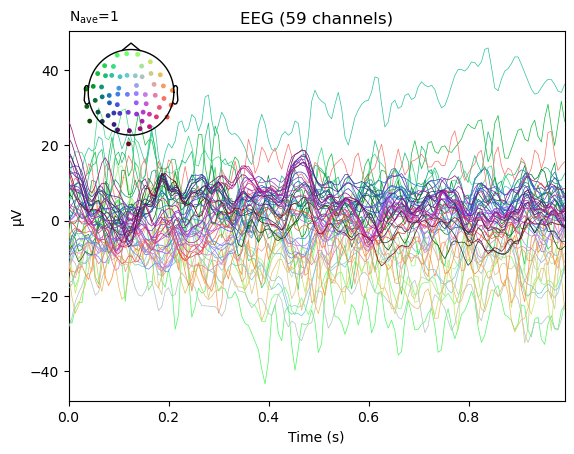

Got epoch 2/5
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


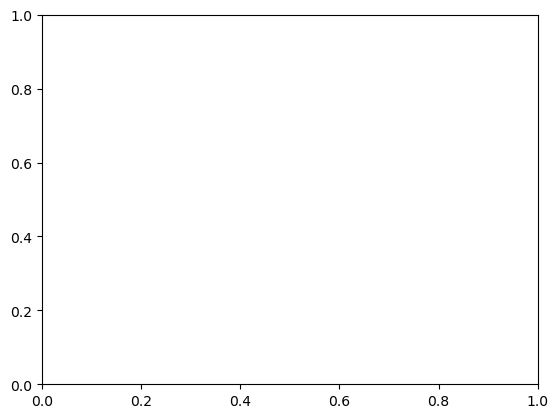

Got epoch 3/5
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


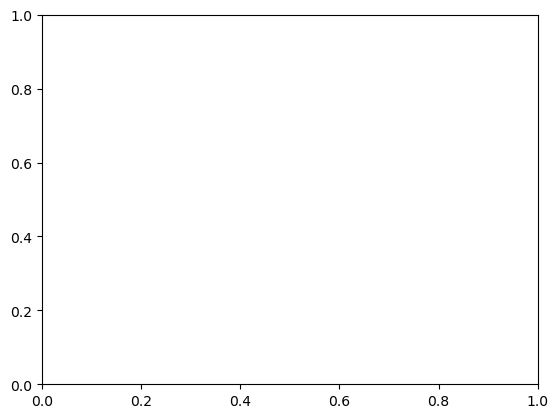

Got epoch 4/5
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


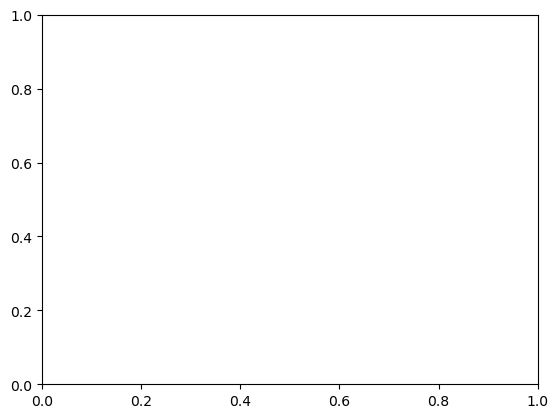

Got epoch 5/5
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


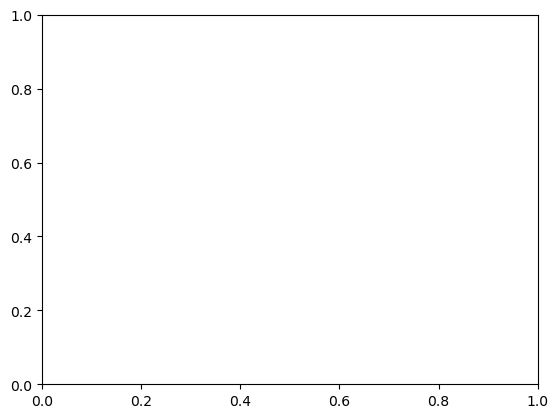

Streams closed
Automatically created module for IPython interactive environment
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
Running subprocess: neuromag2ft --file C:\Users\welcome\mne_data\MNE-sample-data/MEG/sample/sample_audvis_raw.fif --speed 10
Command not found: neuromag2ft


FileNotFoundError: [WinError 2] The system cannot find the file specified

<Figure size 640x480 with 0 Axes>

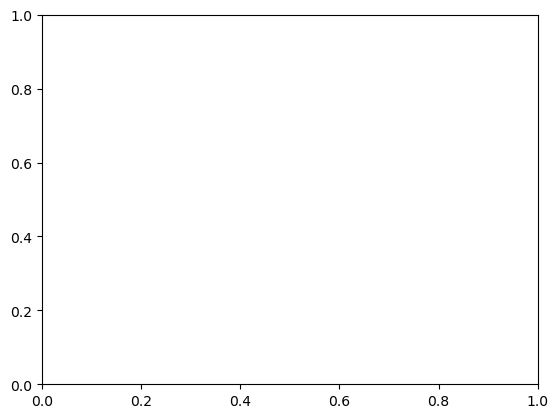

In [4]:
#generate lsl stream from data for mneplottimg

# Author: Teon Brooks <teon.brooks@gmail.com>
#
# License: BSD (3-clause)
import matplotlib.pyplot as plt
from mne.datasets import sample
from mne.io import read_raw_fif

from mne_realtime import LSLClient, MockLSLStream

print(__doc__)

# this is the host id that identifies your stream on LSL
host = 'mne_stream'
# this is the max wait time in seconds until client connection
wait_max = 5


# Load a file to stream raw data
data_path = sample.data_path()
raw_fname = data_path  / 'MEG' / 'sample' / 'sample_audvis_filt-0-40_raw.fif'
raw = read_raw_fif(raw_fname).crop(0, 30).load_data().pick('eeg')

# For this example, let's use the mock LSL stream.
_, ax = plt.subplots(1)
n_epochs = 5

# main function is necessary here to enable script as own program
# in such way a child process can be started (primarily for Windows)
if __name__ == '__main__':
    with MockLSLStream(host, raw, 'eeg'):
        with LSLClient(info=raw.info, host=host, wait_max=wait_max) as client:
            client_info = client.get_measurement_info()
            sfreq = int(client_info['sfreq'])

            # let's observe ten seconds of data
            for ii in range(n_epochs):
                print('Got epoch %d/%d' % (ii + 1, n_epochs))
                plt.cla()
                epoch = client.get_data_as_epoch(n_samples=sfreq)
                epoch.average().plot(axes=ax)
                plt.pause(1.)
            plt.draw()
print('Streams closed')

#next part

# Author: Mainak Jas <mainak@neuro.hut.fi>
#
# License: BSD (3-clause)

import os.path as op
import subprocess
import time

import numpy as np
import matplotlib.pyplot as plt

import mne
# from mne.time_frequency import psd_welch
from mne.utils import running_subprocess

from mne_realtime import FieldTripClient

print(__doc__)

# user should provide info and list of bad channels because
# FieldTrip header object does not provide them
data_path = mne.datasets.sample.data_path()
info = mne.io.read_info(op.join(data_path, 'MEG', 'sample',
                                'sample_audvis_raw.fif'))
bads = ['MEG 2443', 'EEG 053']

fig, ax = plt.subplots(1)

speedup = 10
command = ["neuromag2ft", "--file",
           "{}/MEG/sample/sample_audvis_raw.fif".format(data_path),
           "--speed", str(speedup)]
with running_subprocess(command, after='kill',
                        stdout=subprocess.PIPE, stderr=subprocess.PIPE):
    with FieldTripClient(host='localhost', port=1972,
                         tmax=10, wait_max=5, info=info) as rt_client:

        # select gradiometers
        picks = mne.pick_types(info, meg='grad', eeg=False, eog=True,
                               stim=False, include=[], exclude=bads)

        n_fft = 256  # the FFT size. Ideally a power of 2
        n_samples = 2048  # time window on which to compute FFT

        # make sure at least one epoch is available
        time.sleep(n_samples / info['sfreq'])

        for ii in range(5):
            epoch = rt_client.get_data_as_epoch(n_samples=n_samples,
                                                picks=picks)
            psd, freqs = mne.time_frequency.psd_welch(epoch, fmin=2, fmax=200, n_fft=n_fft)

            cmap = 'RdBu_r'
            freq_mask = freqs < 150
            freqs = freqs[freq_mask]
            log_psd = 10 * np.log10(psd[0])

            tmin = epoch.events[0][0] / info['sfreq']
            tmax = (epoch.events[0][0] + n_samples) / info['sfreq']

            if ii == 0:
                im = ax.imshow(log_psd[:, freq_mask].T, aspect='auto',
                               origin='lower', cmap=cmap)

                ax.set_yticks(np.arange(0, len(freqs), 10))
                ax.set_yticklabels(freqs[::10].round(1))
                ax.set_xlabel('Frequency (Hz)')
                ax.set_xticks(np.arange(0, len(picks), 30))
                ax.set_xticklabels(picks[::30])
                ax.set_xlabel('MEG channel index')
                im.set_clim()
            else:
                im.set_data(log_psd[:, freq_mask].T)

            plt.title('continuous power spectrum (t = %0.2f sec to %0.2f sec)'
                      % (tmin, tmax), fontsize=10)

            plt.pause(0.5 / speedup)

